In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned IoT data
df = pd.read_csv("cleaned_iot_data.csv")

# Display first few rows to verify data
print(df.head())

       block_timestamp sensor_id  soil_moisture  electrical_conductivity  \
0  2025-06-09 04:09:02  Sensor_1             30                      8.7   
1  2025-06-09 04:09:03  Sensor_2             29                      1.0   
2  2025-06-09 04:09:04  Sensor_3              4                      0.9   
3  2025-06-09 04:09:04  Sensor_4             31                      5.7   
4  2025-06-09 04:09:05  Sensor_5             49                      9.4   

   soil_ph     sensor_timestamp  
0     11.4  2025-05-23 19:57:42  
1     12.4  2025-05-24 01:33:42  
2      3.0  2025-05-24 04:45:42  
3     13.9  2025-05-23 18:31:42  
4      3.7  2025-05-24 13:16:42  


In [2]:
# Convert timestamp to datetime
df["sensor_timestamp"] = pd.to_datetime(df["sensor_timestamp"])

In [3]:
sns.set(style="whitegrid")

In [4]:
# Melt the dataframe
df_melted = pd.melt(
    df,
    id_vars=["sensor_timestamp", "sensor_id"],
    value_vars=["soil_moisture", "electrical_conductivity", "soil_ph"],
    var_name="data_type",
    value_name="numeric_value"
)

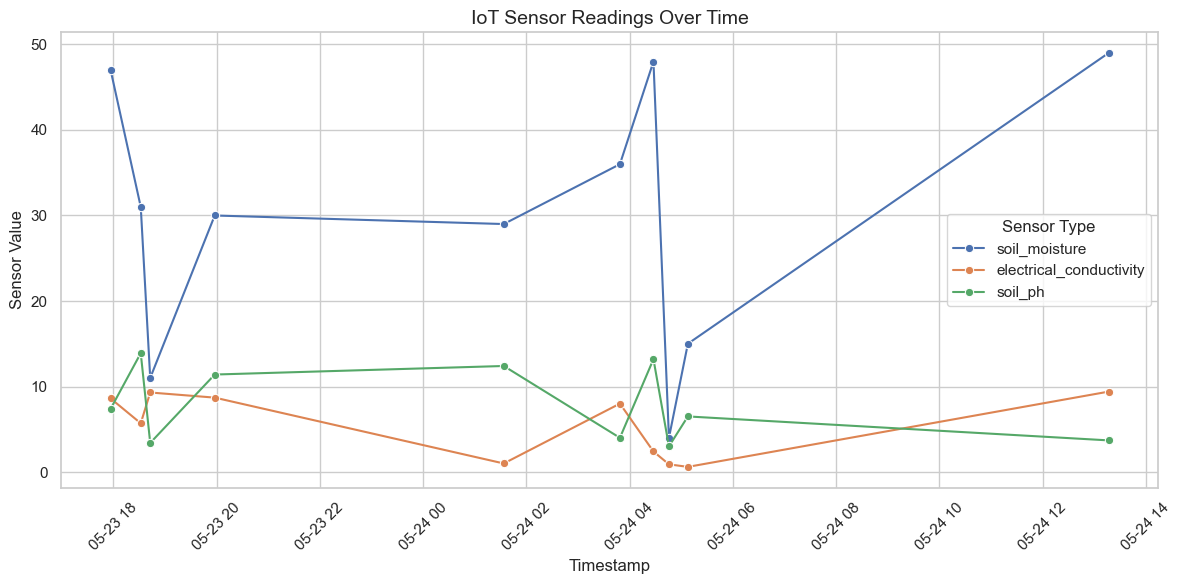

In [5]:
# Check if melting was successful
if df_melted.empty:
    print("Melted DataFrame is empty. Please check column names and data.")
else:
    # Plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=df_melted,
        x="sensor_timestamp",
        y="numeric_value",
        hue="data_type",
        marker="o"
    )

    # Axis labels and title
    plt.xticks(rotation=45)
    plt.title("IoT Sensor Readings Over Time", fontsize=14)
    plt.xlabel("Timestamp", fontsize=12)
    plt.ylabel("Sensor Value", fontsize=12)
    plt.legend(title="Sensor Type")

    # Improve layout and show
    plt.tight_layout()
    plt.show()